In [2]:
import torch
from parsing.config import cfg
from parsing.utils.comm import to_device
from parsing.dataset.build import build_transform
from parsing.detector import get_hawp_model
from parsing.utils.logger import setup_logger
from skimage import io
import argparse
import matplotlib.pyplot as plt

parser = argparse.ArgumentParser(description='HAWP Testing')

# parser.add_argument("--img",type=str,required=True,
#                     help="image path")                    

# parser.add_argument("--threshold",
#                     type=float,
#                     default=0.97)

# args = parser.parse_args()

In [ ]:
figures/example.png

/Users/kkarthik/Desktop/Auto roofline/hawp/hawp_cherubic/parsing/detector.py:45: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  y = (index // width).float() + torch.gather(joff[1], 0, index) + 0.5


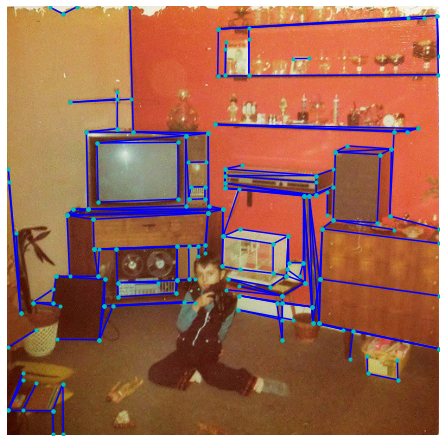

In [39]:
cfg.freeze()
impath='../figures/example.png'
threshold=0.7
device = cfg.MODEL.DEVICE
model = get_hawp_model(pretrained=True)
model = model.to(device)

transform = build_transform(cfg)
image = io.imread(impath)
image_tensor = transform(image.astype(float))[None].to(device)
meta = {
    'filename': impath,
    'height': image.shape[0],
    'width': image.shape[1],
}

with torch.no_grad():
    output, _ = model(image_tensor,[meta])
    output = to_device(output,'cpu')


lines = output['lines_pred'].numpy()
scores = output['lines_score'].numpy()
idx = scores>threshold

plt.figure(figsize=(6,6))    
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
        hspace = 0, wspace = 0)
plt.imshow(image)
plt.plot([lines[idx,0],lines[idx,2]],
                    [lines[idx,1],lines[idx,3]], 'b-')
plt.plot(lines[idx,0],lines[idx,1],'c.')                        
plt.plot(lines[idx,2],lines[idx,3],'c.')                        
plt.axis('off')
plt.show()

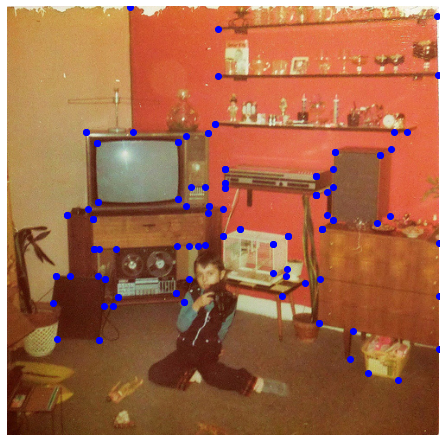

In [38]:
plt.figure(figsize=(6,6))    
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
        hspace = 0, wspace = 0)
plt.imshow(image)
# plt.plot([lines[idx,0],lines[idx,2]],
#                     [lines[idx,1],lines[idx,3]], 'b-')
plt.plot(lines[idx,0],lines[idx,1],'bo')                        
plt.axis('off')
plt.show()

In [42]:
idx

array([ True, False,  True,  True, False,  True, False,  True, False,
        True, False, False,  True, False,  True,  True,  True, False,
       False, False, False, False,  True, False, False,  True, False,
        True,  True,  True, False,  True,  True,  True, False, False,
        True, False, False, False, False, False, False,  True,  True,
        True, False,  True, False,  True,  True, False,  True,  True,
       False,  True, False, False, False, False,  True, False,  True,
       False, False, False, False, False,  True, False, False,  True,
        True, False, False,  True, False,  True, False, False, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True, False,  True, False, False, False, False, False,
        True,  True,  True,  True,  True, False, False, False,  True,
        True, False,  True, False,  True,  True, False, False,  True,
       False, False,  True,  True, False, False, False,  True, False,
       False, False,

In [7]:
lines.shape

(510, 4)

In [9]:
scores.shape

(510,)

In [11]:
sum(idx)

59

In [13]:
image_tensor.shape

torch.Size([1, 3, 512, 512])

In [14]:
meta

{'filename': '../figures/example.png', 'height': 496, 'width': 500}

In [15]:
device

'cpu'

In [18]:
output.keys()

dict_keys(['lines_pred', 'lines_score', 'juncs_pred', 'juncs_score', 'num_proposals', 'filename', 'width', 'height'])

In [20]:
output['juncs_pred'].shape

torch.Size([203, 2])

In [40]:
output['juncs_score']

tensor([0.8512, 0.8243, 0.8167, 0.7883, 0.7847, 0.6992, 0.6917, 0.6879, 0.6858,
        0.6823, 0.6524, 0.6508, 0.6409, 0.6322, 0.6256, 0.6254, 0.5962, 0.5650,
        0.5414, 0.5390, 0.5309, 0.5278, 0.5245, 0.5195, 0.5177, 0.5109, 0.5002,
        0.4947, 0.4924, 0.4905, 0.4862, 0.4854, 0.4853, 0.4833, 0.4813, 0.4805,
        0.4757, 0.4688, 0.4678, 0.4514, 0.4388, 0.4366, 0.4337, 0.4255, 0.4234,
        0.4123, 0.4112, 0.4064, 0.4044, 0.3974, 0.3835, 0.3831, 0.3687, 0.3540,
        0.3333, 0.3271, 0.3174, 0.3116, 0.3054, 0.3031, 0.3028, 0.2997, 0.2990,
        0.2988, 0.2889, 0.2782, 0.2671, 0.2640, 0.2570, 0.2533, 0.2520, 0.2454,
        0.2411, 0.2385, 0.2319, 0.2270, 0.2244, 0.2208, 0.2203, 0.2202, 0.2182,
        0.2151, 0.2126, 0.2060, 0.2033, 0.2022, 0.2012, 0.1993, 0.1953, 0.1905,
        0.1850, 0.1848, 0.1846, 0.1815, 0.1747, 0.1721, 0.1701, 0.1694, 0.1563,
        0.1509, 0.1462, 0.1452, 0.1399, 0.1367, 0.1364, 0.1328, 0.1322, 0.1295,
        0.1293, 0.1275, 0.1267, 0.1264, 

In [25]:
output['height']

496

In [28]:
output, _ = model(image_tensor,[meta])

/Users/kkarthik/Desktop/Auto roofline/hawp/hawp_cherubic/parsing/detector.py:45: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  y = (index // width).float() + torch.gather(joff[1], 0, index) + 0.5


In [30]:
output

{'lines_pred': tensor([[251.7505, 187.7164, 357.0021, 195.4628],
         [251.7505, 187.7164, 357.0054, 203.2932],
         [251.7505, 187.7164, 251.3863, 210.0696],
         ...,
         [244.1363, 411.9575, 322.7714, 435.9397],
         [244.1363, 411.9575, 248.0561, 389.4387],
         [263.6834,  32.8132, 499.0117,  21.6271]], grad_fn=<CopySlices>),
 'lines_score': tensor([0.9715, 0.1580, 0.9911, 0.9769, 0.0656, 0.9618, 0.0639, 0.9966, 0.1743,
         0.9913, 0.0909, 0.5125, 0.7397, 0.6605, 0.9980, 0.9842, 0.8200, 0.1639,
         0.1474, 0.0662, 0.0605, 0.3800, 0.9979, 0.0849, 0.4075, 0.8231, 0.3078,
         0.9884, 0.9942, 0.7165, 0.1526, 0.9789, 0.7717, 0.9984, 0.0834, 0.4269,
         0.7192, 0.1463, 0.1027, 0.0858, 0.0547, 0.6110, 0.1951, 0.9239, 0.9971,
         0.9960, 0.3596, 0.8238, 0.0632, 0.9976, 0.9963, 0.6972, 0.8103, 0.9975,
         0.1100, 0.9971, 0.4023, 0.6678, 0.1175, 0.1948, 0.7350, 0.3360, 0.8423,
         0.0686, 0.2614, 0.2786, 0.6480, 0.1533, 0.9928, 0.1

In [59]:
import json
  
# Opening JSON file
f = open('../data/york/test.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

In [60]:
data

[{'filename': 'P1080015.png',
  'junc': [[193.17999267578125, 303.17333984375],
   [193.75999450683594, 0.5866666436195374],
   [158.89999389648438, 302.79998779296875],
   [162.66000366210938, 0.9333333373069763],
   [156.86000061035156, 303.1199951171875],
   [160.25999450683594, 0.9866666793823242],
   [104.33999633789062, 303.1199951171875],
   [111.62000274658203, 0.8266666531562805],
   [106.9800033569336, 303.6000061035156],
   [114.30000305175781, 0.5600000023841858],
   [37.41999816894531, 295.760009765625],
   [49.400001525878906, 0.9066666960716248],
   [35.459999084472656, 295.38665771484375],
   [46.540000915527344, 0.9866666793823242],
   [0.8600000143051147, 184.0800018310547],
   [10.539999961853027, 0.7733333110809326],
   [0.5400000214576721, 129.73333740234375],
   [7.619999885559082, 0.9866666793823242],
   [85.54000091552734, 302.9599914550781],
   [94.45999908447266, 0.7733333110809326],
   [60.7400016784668, 412.7200012207031],
   [63.060001373291016, 319.6000061

In [61]:
len(data)

102

In [53]:
data[0].keys()

dict_keys(['width', 'height', 'lines', 'junc', 'filename'])

In [57]:
len(data[2]['lines'])

120

In [49]:
data[:20]

[{'junctions': [[164.16184997558594, 26.80635643005371],
   [169.25286865234375, 119.97126770019531],
   [278.03466796875, 119.29190826416016],
   [278.03466796875, 24.494216918945312],
   [278.61273193359375, 41.257225036621094],
   [493.6416320800781, 37.78901672363281],
   [499.9996032714844, 0.43103447556495667],
   [479.4715576171875, 154.77642822265625],
   [230.74713134765625, 121.69539642333984],
   [231.17816162109375, 140.66091918945312],
   [248.75, 147.2916717529297],
   [434.9137878417969, 147.55746459960938],
   [185.54913330078125, 0.0],
   [187.28323364257812, 26.228321075439453],
   [169.94219970703125, 0.0],
   [171.0982666015625, 26.228321075439453],
   [349.712646484375, 0.0],
   [347.86822509765625, 39.24418640136719],
   [392.81610107421875, 0.0],
   [390.5038757324219, 38.08139419555664],
   [400.0, 0.21676300466060638],
   [397.4806213378906, 38.08139419555664],
   [81.50289154052734, 0.0],
   [101.43678283691406, 171.69540405273438],
   [0.5780346989631653, 130

In [62]:
with open('test.json', 'w', encoding='utf-8') as f:
    json.dump(data[:5], f, ensure_ascii=False, indent=4)

In [2]:
import torch

ModuleNotFoundError: No module named 'torch'

In [11]:
import networkx as nx
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler

In [12]:
nx.__version__

'3.1'

In [13]:
#load graph from networkx library
G = nx.karate_club_graph()

# retrieve the labels for each node
labels = np.asarray([G.nodes[i]['club'] != 'Mr. Hi' for i in G.nodes]).astype(np.int64)

# create edge index from 
adj = nx.to_scipy_sparse_array(G).tocoo()
row = torch.from_numpy(adj.row.astype(np.int64)).to(torch.long)
col = torch.from_numpy(adj.col.astype(np.int64)).to(torch.long)
edge_index = torch.stack([row, col], dim=0)

# using degree as embedding
embeddings = np.array(list(dict(G.degree()).values()))

# normalizing degree values
scale = StandardScaler()
embeddings = scale.fit_transform(embeddings.reshape(-1,1))

In [14]:
labels.shape

(34,)

In [15]:
edge_index.shape

torch.Size([2, 156])

In [16]:
(dict(G.degree())).values()

dict_values([16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17])

In [18]:
import torch
import pandas as pd
from torch_geometric.data import InMemoryDataset, Data
from sklearn.model_selection import train_test_split
import torch_geometric.transforms as T

# custom dataset
class KarateDataset(InMemoryDataset):
    def __init__(self, transform=None):
        super(KarateDataset, self).__init__('.', transform, None, None)

        data = Data(edge_index=edge_index)
        
        data.num_nodes = G.number_of_nodes()
        
        # embedding 
        data.x = torch.from_numpy(embeddings).type(torch.float32)
        
        # labels
        y = torch.from_numpy(labels).type(torch.long)
        data.y = y.clone().detach()
        
        data.num_classes = 2

        # splitting the data into train, validation and test
        X_train, X_test, y_train, y_test = train_test_split(pd.Series(list(G.nodes())), 
                                                            pd.Series(labels),
                                                            test_size=0.30, 
                                                            random_state=42)
        
        n_nodes = G.number_of_nodes()
        
        # create train and test masks for data
        train_mask = torch.zeros(n_nodes, dtype=torch.bool)
        test_mask = torch.zeros(n_nodes, dtype=torch.bool)
        train_mask[X_train.index] = True
        test_mask[X_test.index] = True
        data['train_mask'] = train_mask
        data['test_mask'] = test_mask

        self.data, self.slices = self.collate([data])

    def _download(self):
        return

    def _process(self):
        return

    def __repr__(self):
        return '{}()'.format(self.__class__.__name__)
    
dataset = KarateDataset()
data = dataset[0]


ModuleNotFoundError: No module named 'torch_geometric'

In [19]:
import torch

!pip uninstall torch-scatter torch-sparse torch-geometric torch-cluster  --y
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

Looking in links: https://data.pyg.org/whl/torch-2.0.1.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.6/107.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
anceled
ERROR: Operation cancelled by user


UnboundLocalError: cannot access local variable 'child' where it is not associated with a value

In [20]:
import torch